In [3]:
fnames = io.l1b_filenames('mvn_iuv_l1b_cruisecal2-mode080-muv_20140521T12002', iterator=False)

In [5]:
fname = fnames[0]
fnames

['/maven_iuvs/stage/products/level1b/mvn_iuv_l1b_cruisecal2-mode080-muv_20140521T120029_v01_r01.fits.gz']

In [11]:
import seaborn as sns
sns.set_context('talk')
sns.set_style('white')

In [7]:
def calc_4_to_3(width):
    return width, width*3/4
plt.style.use('bmh')
plt.rcParams['figure.figsize']= calc_4_to_3(9)
plt.rcParams['image.aspect'] = 'auto'
plt.rcParams['image.interpolation'] = 'none'
plt.rcParams['lines.linewidth'] = 1
plt.ioff()

In [8]:
plt.ion()

In [9]:
l1b = io.L1BReader(fname)

<IPython.core.display.Javascript object>


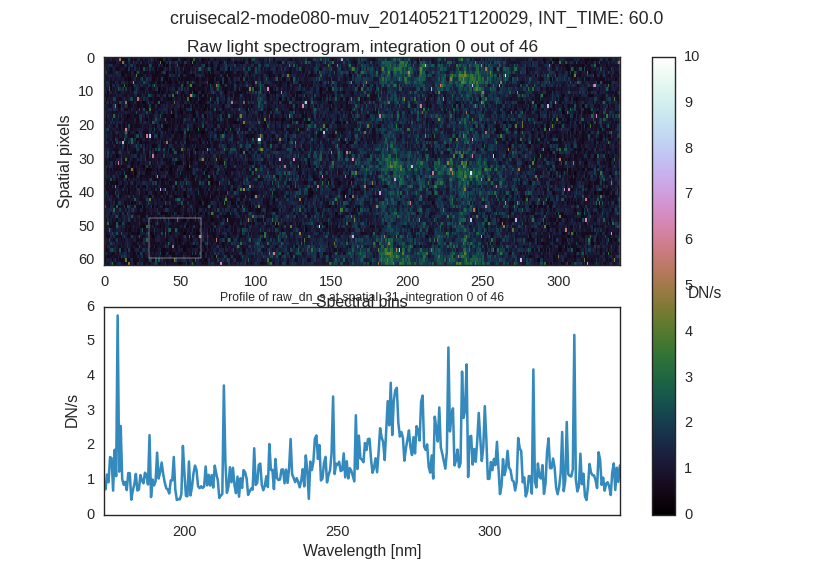

In [12]:
l1b.plot_raw_overview(0, save_token='1_int0', proflog=False, imglog=False);

In [13]:
%matplotlib nbagg

<IPython.core.display.Javascript object>


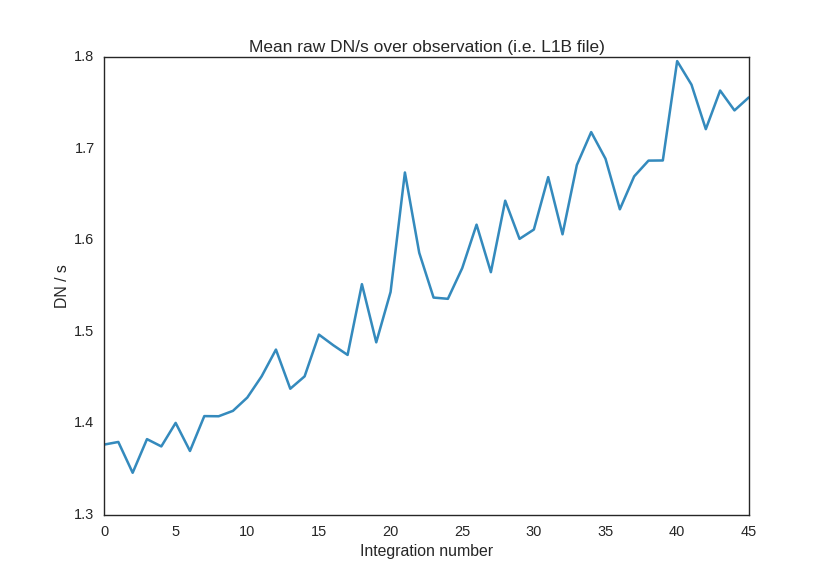

In [14]:
plt.figure()
plt.plot(l1b.raw_dn_s.mean(axis=(1,2)))
plt.xlabel("Integration number")
plt.ylabel("DN / s")
plt.title("Mean raw DN/s over observation (i.e. L1B file)")
plt.savefig('/home/klay6683/plots/mean_raw_increase_over_obs.png',dpi=120)

In [15]:
sets = [(0,0), (0,1), (1,0), (1,1), (1, -1), (-1, 1), (-1, -1)]

plt.ioff()
for index in sets:
    print(index)
    dfitter = scaling.DarkFitter(l1b, raw_integration=index[0], dark_integration=index[1])
    dfitter.plot_profiles(save_token='{}{}'.format(*index))
    plt.close('all')

(0, 0)
(0, 1)
(1, 0)
(1, 1)
(1, -1)
(-1, 1)
(-1, -1)
